# Desafío - Análisis de ventas y rendimiento de las tiendas

El objetivo de este desafío es ayudar al señor Juan a decidir qué tienda debe vender para invertir en un nuevo negocio. Para ello, evaluaremos cuál de estas cuatro tiendas tiene un desempeño menor, permitiendo al señor Juan tomar la decisión de cuál de estas cuatro tiendas debe vender para invertir en un nuevo negocio.

Te han contratado para realizar este análisis. Tu jefe te ha pedido que hagas la evaluación basándose en estos cinco aspectos:

1. Facturación total de cada tienda, es decir, cuál tienda vende más. 
2. Cuáles son las categorías más populares de cada tienda, es decir, cuáles productos se venden más en cada tienda?
3. Cuál es el promedio de evaluación de cada uno de los clientes?
4. Cuáles son los productos más y menos vendidos en cada tienda?
5. Cuál es el costo promedio del envío desde la tienda hasta el lugar de cada uno de los clientes?

Con estos datos, ayudara al señor Juan a tomar una decisión fundamental y estratégica.

### Importación de la base de datos

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install plotly
%pip install numpy
%pip install seaborn

In [153]:
import pandas as pd;
import matplotlib.pyplot as plt;
import plotly.graph_objects as go;
import matplotlib.ticker as ticker;
import numpy as np;
import seaborn as sns;

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


### Estructura de datos:
El conjunto de datos incluye la siguiente información:

`Producto y Categoría`: Artículos vendidos y sus calificaciones.

`Precio y Envío`: Valores de venta y costos asociados.

`Fecha y ubicación de compra`: Información temporal y geográfica.

`Evaluación de compra`: Comentarios de clientes.

`Tipo de Pago y Cuotas`: Métodos utilizados por los clientes.

`Coordenadas Geográficas`: Ubicación de las transacciones.

- Verificamos datos faltantes o nulos en las bases de datos:

In [154]:
tienda1.info();
tienda2.info();
tienda3.info();
tienda4.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns 

- Verificamos las dimensiones de las 4 bases de datos:

In [155]:
print("Las 4 bases de datos tienen las siguientes dimensiones:");
print(f"Tienda 1: {tienda1.shape[0]} filas, {tienda1.shape[1]} columnas");
print(f"Tienda 2: {tienda2.shape[0]} filas, {tienda2.shape[1]} columnas");
print(f"Tienda 3: {tienda3.shape[0]} filas, {tienda3.shape[1]} columnas");
print(f"Tienda 4: {tienda4.shape[0]} filas, {tienda4.shape[1]} columnas");

Las 4 bases de datos tienen las siguientes dimensiones:
Tienda 1: 2359 filas, 12 columnas
Tienda 2: 2359 filas, 12 columnas
Tienda 3: 2359 filas, 12 columnas
Tienda 4: 2358 filas, 12 columnas


Falta una fila en la Tienda 4, respecto a las otras tiendas.

In [156]:
faltant = len(tienda1[tienda1.isnull().any(axis=1)]) + len(tienda2[tienda2.isnull().any(axis=1)]) + len(tienda3[tienda3.isnull().any(axis=1)]) + len(tienda4[tienda4.isnull().any(axis=1)]);
print(f"Total de filas con datos faltantes: {faltant}");

Total de filas con datos faltantes: 0


No hay filas con datos faltantes, así que simplemente rellenaremos la fila faltante con Nan(valores faltantes)

In [147]:
tienda4 = tienda4.dropna(how='all');  
print(tienda4.shape); 

(2358, 12)


No hay elementos nulos, faltantes o erroneos en la información que viene de las 4 tiendas, pero si hacia falta una fila en la base de datos que venia por parte de la Tienda 4.

## 1. Análisis de facturación:

En este primer análisis, debemos calcular el ingreso total de cada tienda. Sumando los valores de la columna `Precio` de cada conjunto de datos de la tienda para estimar los ingresos.

- Ingresos totales por tienda:

In [157]:
stores = [tienda1, tienda2, tienda3, tienda4];
sum_stores = [];

def calcular_total_vendido(store):
    df1 = pd.DataFrame(store);
    return df1['Precio'].sum();

for i, store in enumerate(stores):
    total_vendido = calcular_total_vendido(store);
    print(f"Total vendido en Tienda {i+1}: ${total_vendido:,.2f}");

Total vendido en Tienda 1: $1,150,880,400.00
Total vendido en Tienda 2: $1,116,343,500.00
Total vendido en Tienda 3: $1,098,019,600.00
Total vendido en Tienda 4: $1,038,375,700.00


- Promedio de los ingresos totales de las 4 tiendas:

In [161]:
promedio_ingresos = np.mean([calcular_total_vendido(store) for store in stores]);
print(f"Promedio de ingresos: ${promedio_ingresos:,.2f}");

Promedio de ingresos: $1,100,904,800.00


- Gráfica de los ingresos totales de las tiendas respecto a a su promedio:

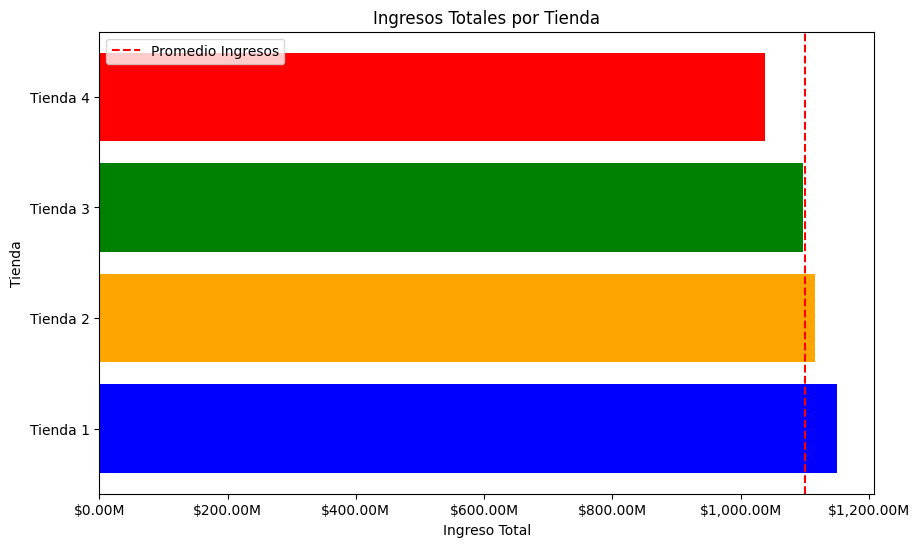

In [163]:
# Asegúrate de que sum_stores tenga los valores correctos antes de graficar
sum_stores = [calcular_total_vendido(store) for store in stores]

plt.figure(figsize=(10, 6));
plt.axvline(promedio_ingresos, color='red', linestyle='--', label='Promedio Ingresos');
plt.legend();
plt.title('Ingresos Totales por Tienda');
plt.ylabel('Tienda');
plt.xlabel('Ingreso Total');
escalax = ticker.FuncFormatter(lambda x, pos: '${:,.2f}M'.format(x/1e6));
plt.gca().xaxis.set_major_formatter(escalax);
plt.barh(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], sum_stores, color=['blue', 'orange', 'green', 'red']);


### En conclusión:

In [168]:
print(f"La tienda con mayor ingreso es la Tienda {sum_stores.index(max(sum_stores)) + 1} con un ingreso total de ${max(sum_stores):,.2f}.");
print(f"Y la tienda con menor ingreso es la Tienda {sum_stores.index(min(sum_stores)) + 1} con un ingreso total de ${min(sum_stores):,.2f}.");

La tienda con mayor ingreso es la Tienda 1 con un ingreso total de $1,089,502,500.00.
Y la tienda con menor ingreso es la Tienda 4 con un ingreso total de $983,058,300.00.


## 2. Ventas por categoría:

En este punto debemos calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

- Lista de las 4 tiendas respecto a tipo de producto, cantidad de producto y total del producto vendido:

In [169]:
def calcular_categorias(store,categoria):
    df1 = pd.DataFrame(store);
    return df1.groupby([categoria]).agg(
    cantidad_productos=(categoria, 'size'),
    cantidad_vendida=('Precio', 'sum'),
    );

resultados_store = {};
for i, store in enumerate(stores):
    resultados_store[f'Tienda {i+1}'] = calcular_categorias(store, 'Categoría del Producto');

for nombre_store, categorias in resultados_store.items():
    print(f"\n{nombre_store}:");
    categorias = categorias.sort_values(by='cantidad_vendida', ascending=False);
    categorias['cantidad_vendida'] = categorias['cantidad_vendida'].map('${:,.2f}'.format);
    print(categorias);
    


Tienda 1:
                         cantidad_productos cantidad_vendida
Categoría del Producto                                      
Electrónicos                            448  $429,493,500.00
Electrodomésticos                       312  $363,685,200.00
Muebles                                 465  $187,633,700.00
Instrumentos musicales                  182   $91,299,000.00
Deportes y diversión                    284   $39,290,000.00
Juguetes                                324   $17,995,700.00
Artículos para el hogar                 171   $12,698,400.00
Libros                                  173    $8,784,900.00

Tienda 2:
                         cantidad_productos cantidad_vendida
Categoría del Producto                                      
Electrónicos                            422  $410,831,100.00
Electrodomésticos                       305  $348,567,800.00
Muebles                                 442  $176,426,300.00
Instrumentos musicales                  224  $104,990,300.00
De

- Convertimos la información obtenida en un dataframe para mayor eficiencia.

In [170]:
def calcular_categorias(store,categoria):
    df = pd.DataFrame(store);
    return df.groupby([categoria]).agg(
    cantidad_productos=(categoria, 'size'),
    cantidad_vendida=('Precio', 'sum'),
    );

resultados_store = {};

for i, store in enumerate(stores):
    categorias = calcular_categorias(store, 'Categoría del Producto');
    categorias['Tienda'] = f'Tienda {i+1}';
    categorias = categorias.reset_index();
    resultados_store[f'Tienda {i+1}'] = categorias;

df1 = pd.concat(resultados_store.values(), ignore_index=True);

df1['cantidad_vendida'] = df1['cantidad_vendida'].map('{:,.2f}'.format);
print(df1);

     Categoría del Producto  cantidad_productos cantidad_vendida    Tienda
0   Artículos para el hogar                 171    12,698,400.00  Tienda 1
1      Deportes y diversión                 284    39,290,000.00  Tienda 1
2         Electrodomésticos                 312   363,685,200.00  Tienda 1
3              Electrónicos                 448   429,493,500.00  Tienda 1
4    Instrumentos musicales                 182    91,299,000.00  Tienda 1
5                  Juguetes                 324    17,995,700.00  Tienda 1
6                    Libros                 173     8,784,900.00  Tienda 1
7                   Muebles                 465   187,633,700.00  Tienda 1
8   Artículos para el hogar                 181    14,746,900.00  Tienda 2
9      Deportes y diversión                 275    34,744,500.00  Tienda 2
10        Electrodomésticos                 305   348,567,800.00  Tienda 2
11             Electrónicos                 422   410,831,100.00  Tienda 2
12   Instrumentos musical

- Gráfica de Cantidad de productos vendidos por Categoría y Tienda:

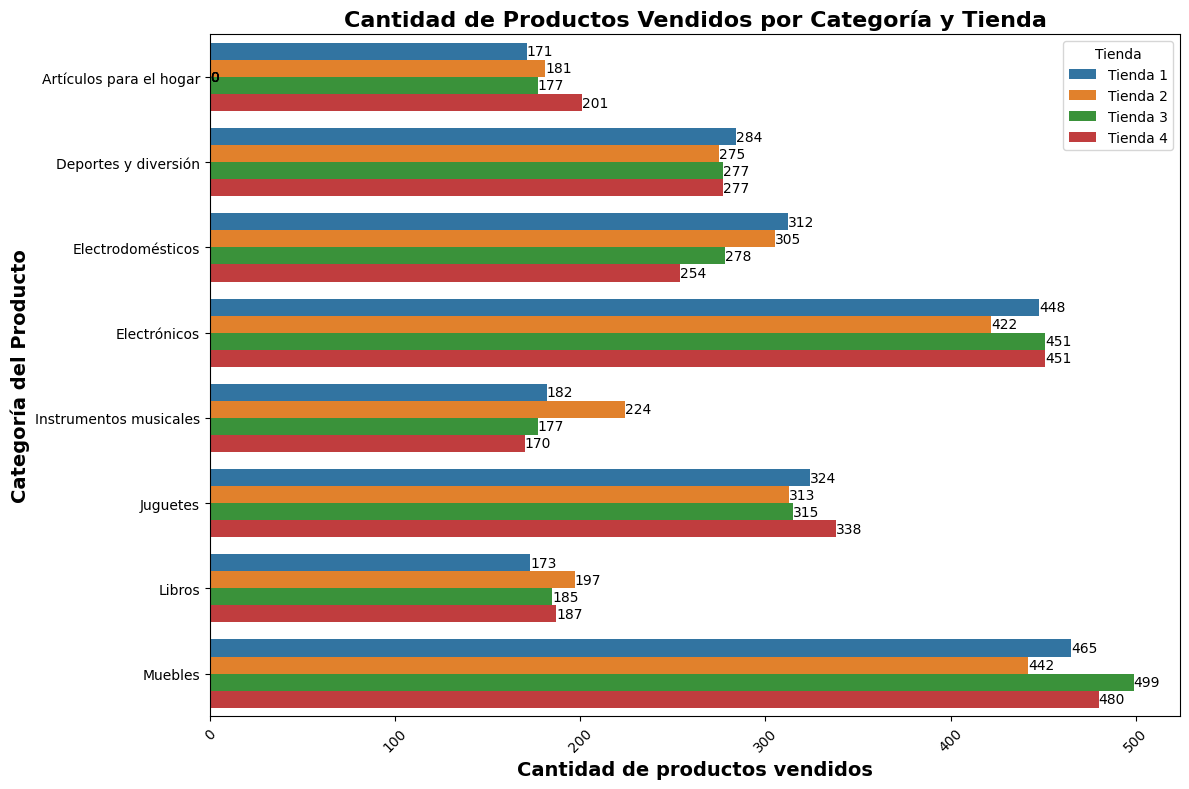

In [171]:
df1['cantidad_productos'] = df1['cantidad_productos'].astype(float);

plt.figure(figsize=(12, 8));
ax = sns.barplot(
    data=df1,
    y='Categoría del Producto',
    x='cantidad_productos',
    hue='Tienda'
)

for barra in ax.patches:
    cantidad = barra.get_width();
    ax.text(cantidad, barra.get_y() + barra.get_height()/2, 
            f'{cantidad:,.0f}', va='center', ha='left', fontsize=10, color='black');

plt.title('Cantidad de Productos Vendidos por Categoría y Tienda', fontsize=16, fontweight='bold');
plt.xlabel('Cantidad de productos vendidos', fontsize=14, fontweight='bold');
plt.ylabel('Categoría del Producto', fontsize=14, fontweight='bold');
plt.xticks(rotation=45);
plt.tight_layout();
plt.show();

- Gráfica de Total de Producto Vendido respecto Categoría y tienda:

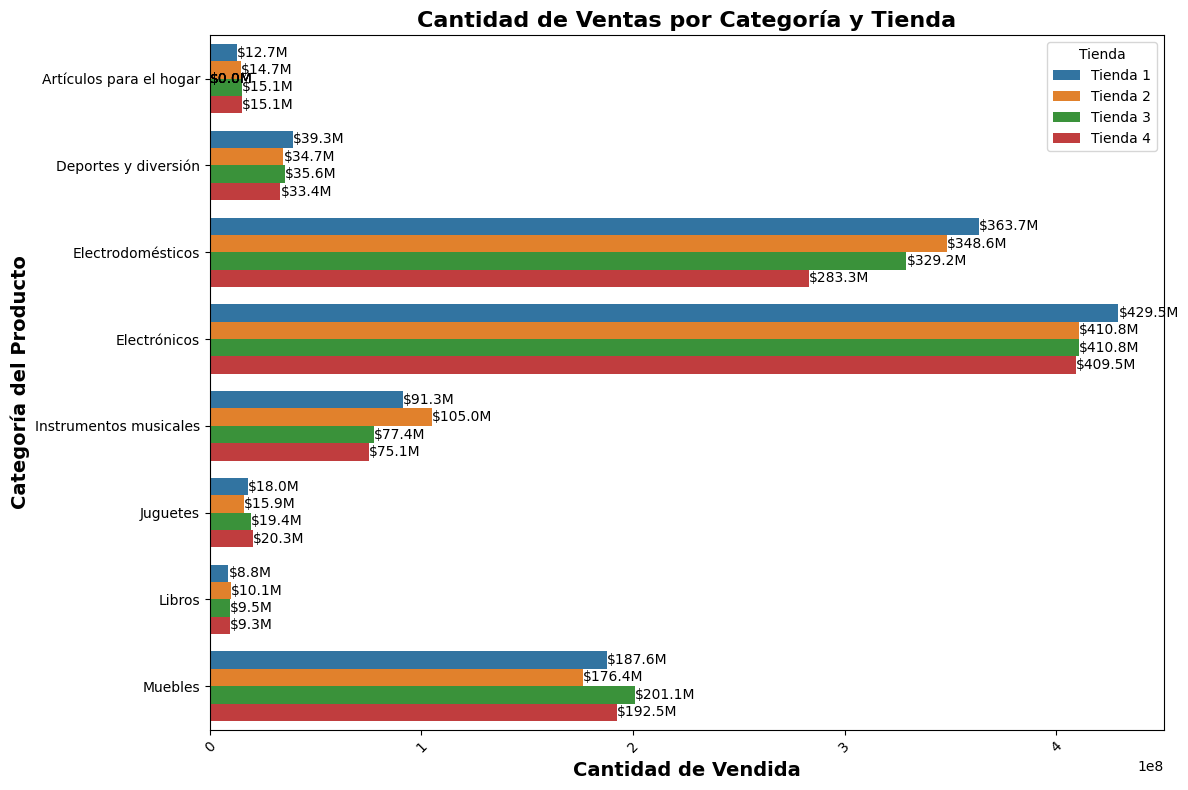

In [172]:
df1['cantidad_vendida'] = df1['cantidad_vendida'].str.replace(',', '').astype(float)

plt.figure(figsize=(12, 8));
ax = sns.barplot(
    data=df1,
    y='Categoría del Producto',
    x='cantidad_vendida',
    hue='Tienda'
)

for barra in ax.patches:
    cantidad = barra.get_width();
    ax.text(cantidad, barra.get_y() + barra.get_height()/2, 
            f'${cantidad/1e6:,.1f}M', va='center', ha='left', fontsize=10, color='black');

plt.title('Cantidad de Ventas por Categoría y Tienda', fontsize=16, fontweight='bold');
plt.xlabel('Cantidad de Vendida', fontsize=14, fontweight='bold');
plt.ylabel('Categoría del Producto', fontsize=14, fontweight='bold');
plt.xticks(rotation=45);
plt.tight_layout();
plt.show();

- En conclusión:

In [173]:
df1['cantidad_productos'] = df1['cantidad_productos'].astype(float)

print("La categoría con más ventas es:", df1.loc[df1['cantidad_vendida'].idxmax(), 'Categoría del Producto']);
print("Y la tienda que más Electrónicos vendió es:", df1.loc[df1['cantidad_vendida'].idxmax(), 'Tienda'], "con un total de:", '${:,.2f}'.format(df1['cantidad_vendida'].max()));
print("La categoría con menos ventas es:", df1.loc[df1['cantidad_vendida'].idxmin(), 'Categoría del Producto']);
print("Y la tienda que menos Libros vendió es:", df1.loc[df1['cantidad_vendida'].idxmin(), 'Tienda'], "con un total de:", '${:,.2f}'.format(df1['cantidad_vendida'].min()));

La categoría con más ventas es: Electrónicos
Y la tienda que más Electrónicos vendió es: Tienda 1 con un total de: $429,493,500.00
La categoría con menos ventas es: Libros
Y la tienda que menos Libros vendió es: Tienda 1 con un total de: $8,784,900.00


- Otras conclusiones:

In [174]:
df1['cantidad_productos'] = df1['cantidad_productos'].astype(float)

print("La categoría con más unidades vendidas es:", df1.loc[df1['cantidad_productos'].idxmax(), 'Categoría del Producto'], "con", df1['cantidad_productos'].max(), "productos vendidos por la tienda", df1.loc[df1['cantidad_productos'].idxmax(), 'Tienda']);
print("La categoría con menor unidades vendidas es:", df1.loc[df1['cantidad_productos'].idxmin(), 'Categoría del Producto'], "con", df1['cantidad_productos'].min(), "productos vendidos por la tienda", df1.loc[df1['cantidad_productos'].idxmin(), 'Tienda']);



La categoría con más unidades vendidas es: Muebles con 499.0 productos vendidos por la tienda Tienda 3
La categoría con menor unidades vendidas es: Instrumentos musicales con 170.0 productos vendidos por la tienda Tienda 4


## 3. Calificación promedio de la tienda:

En este paso, debemos calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

- Lista de la Calificacion de los productos respecto a Categoría y Tienda:

In [175]:
def calcular_categorias(store,calificación):
    df2 = pd.DataFrame(store);
    return df2.groupby(['Categoría del Producto']).agg(
    calidad_prod=(calificación, 'size'),
    suma_cal=('Calificación', 'sum'),
    promedio_cal=('Calificación', 'mean'),
    );

calificacion_store = {};  
  
for e, store in enumerate(stores):
    calificacion_store[f'Tienda {e+1}'] = calcular_categorias(store, 'Calificación');
    
for nombre_store, calificaciones in calificacion_store.items():
    print(f"\n{nombre_store}:");
    calificaciones = calificaciones.sort_values(by='promedio_cal', ascending=False);
    calificaciones['promedio_cal'] = calificaciones['promedio_cal'].map('{:,.2f}'.format);
    print(calificaciones);


Tienda 1:
                         calidad_prod  suma_cal promedio_cal
Categoría del Producto                                      
Juguetes                          324      1321         4.08
Instrumentos musicales            182       737         4.05
Electrodomésticos                 312      1258         4.03
Electrónicos                      448      1794         4.00
Libros                            173       688         3.98
Muebles                           465      1835         3.95
Deportes y diversión              284      1107         3.90
Artículos para el hogar           171       641         3.75

Tienda 2:
                         calidad_prod  suma_cal promedio_cal
Categoría del Producto                                      
Muebles                           442      1809         4.09
Electrodomésticos                 305      1242         4.07
Artículos para el hogar           181       737         4.07
Deportes y diversión              275      1118         4.07
In

- Convertimos la información obtenida en un dataframe para mayor eficiencia:

In [176]:
def calcular_categorias(store,calificación):
    df2 = pd.DataFrame(store);
    return df2.groupby(['Categoría del Producto']).agg(
    calidad_prod=(calificación, 'size'),
    suma_cal=('Calificación', 'sum'),
    promedio_cal=('Calificación', 'mean'),
    );

calificacion_store = {};  

for e, store in enumerate(stores):
    calificaciones = calcular_categorias(store, 'Categoría del Producto');
    calificaciones['Tienda'] = f'Tienda {e+1}';
    calificaciones = calificaciones.reset_index();
    calificacion_store[f'Tienda {e+1}'] = calificaciones;

df2 = pd.concat(calificacion_store.values(), ignore_index=True);

df2['promedio_cal'] = df2['promedio_cal'].map('{:,.2f}'.format)
print(df2)

     Categoría del Producto  calidad_prod  suma_cal promedio_cal    Tienda
0   Artículos para el hogar           171       641         3.75  Tienda 1
1      Deportes y diversión           284      1107         3.90  Tienda 1
2         Electrodomésticos           312      1258         4.03  Tienda 1
3              Electrónicos           448      1794         4.00  Tienda 1
4    Instrumentos musicales           182       737         4.05  Tienda 1
5                  Juguetes           324      1321         4.08  Tienda 1
6                    Libros           173       688         3.98  Tienda 1
7                   Muebles           465      1835         3.95  Tienda 1
8   Artículos para el hogar           181       737         4.07  Tienda 2
9      Deportes y diversión           275      1118         4.07  Tienda 2
10        Electrodomésticos           305      1242         4.07  Tienda 2
11             Electrónicos           422      1676         3.97  Tienda 2
12   Instrumentos musical

- Grafico de la Calificación promedio por Categoria y Tienda:

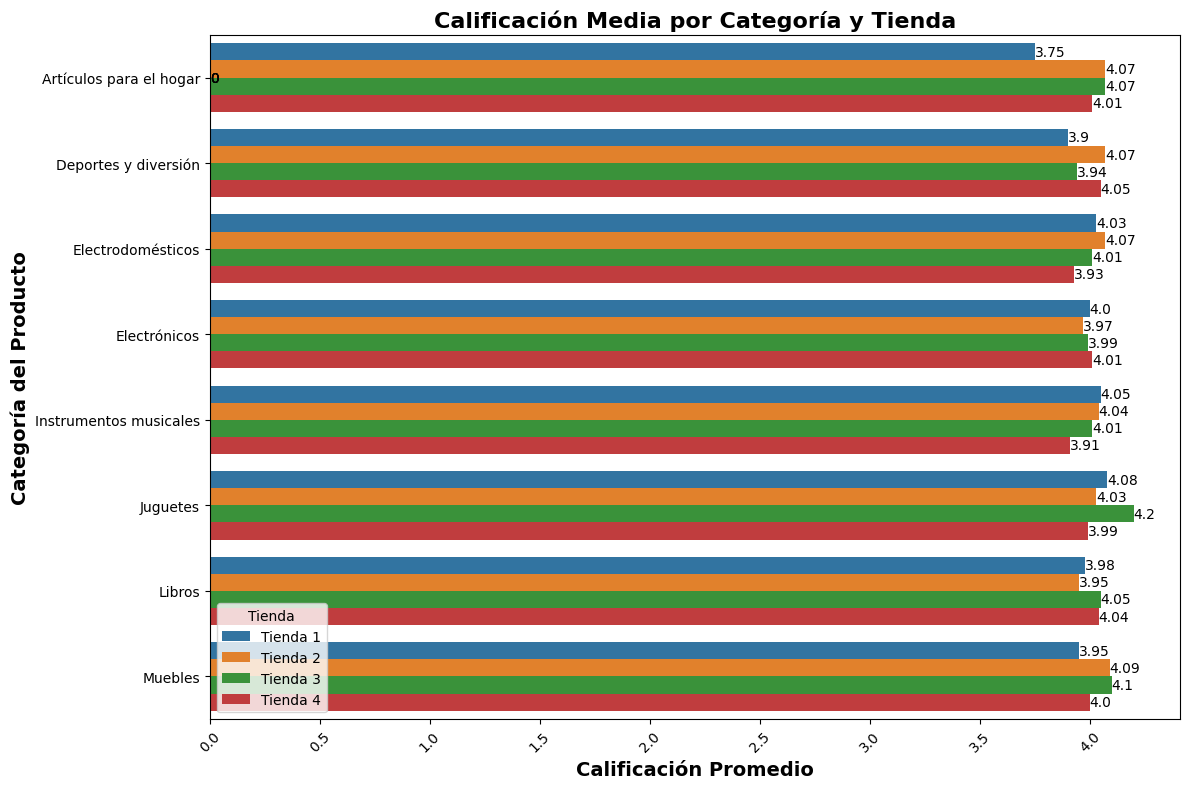

In [177]:
df2['promedio_cal'] = df2['promedio_cal'].astype(float);

plt.figure(figsize=(12, 8));
ax1 = sns.barplot(
    data=df2,
    y = 'Categoría del Producto',
    x = 'promedio_cal',
    hue = 'Tienda'
)

for barra1 in ax1.patches:
    cantidad1 = barra1.get_width();
    ax1.text(cantidad1, barra1.get_y() + barra1.get_height()/2, 
            f'{cantidad1}', va='center', ha='left', fontsize=10, color='black');

plt.title('Calificación Media por Categoría y Tienda', fontsize=16, fontweight='bold');
plt.xlabel('Calificación Promedio', fontsize=14, fontweight='bold');
plt.ylabel('Categoría del Producto', fontsize=14, fontweight='bold');
plt.xticks(rotation=45);
plt.tight_layout();
plt.show();

- Lista del Promedio General por Categoría:

In [178]:
df2['promedio_cal'] = pd.to_numeric(df2['promedio_cal'], errors='coerce');

promedio_categoria = df2.groupby('Categoría del Producto')['promedio_cal'].mean().reset_index();
print(promedio_categoria);

    Categoría del Producto  promedio_cal
0  Artículos para el hogar        3.9750
1     Deportes y diversión        3.9900
2        Electrodomésticos        4.0100
3             Electrónicos        3.9925
4   Instrumentos musicales        4.0025
5                 Juguetes        4.0750
6                   Libros        4.0050
7                  Muebles        4.0350


- Gráfica del Promedio General por Categoría:

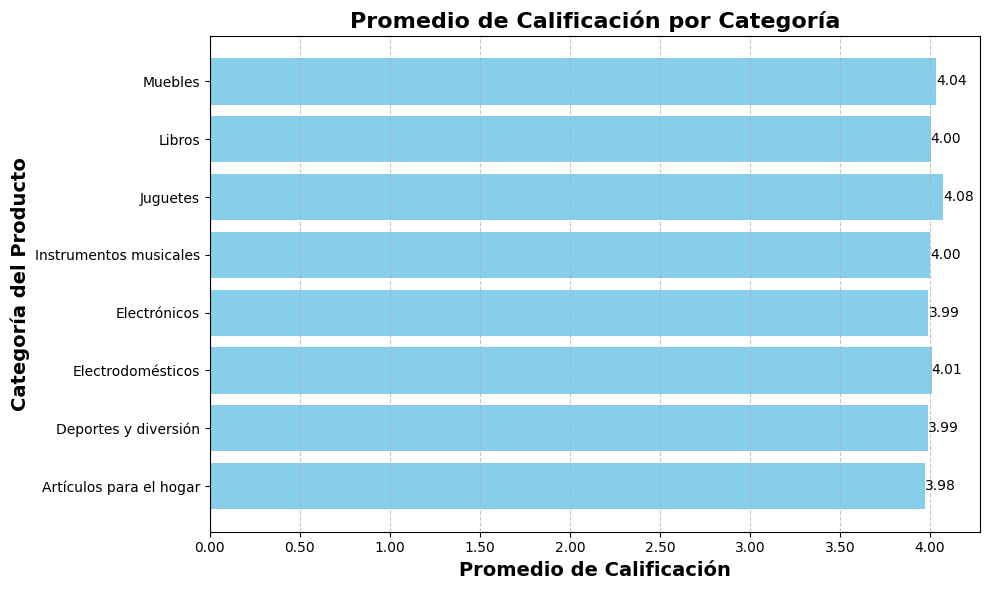

In [179]:
fig, ax2 = plt.subplots(figsize=(10, 6));
ax2.barh(promedio_categoria['Categoría del Producto'], promedio_categoria['promedio_cal'], color='skyblue')

for i, v in enumerate(promedio_categoria['promedio_cal']):
    ax2.text(v, i, f'{v:.2f}', va='center', ha='left', fontsize=10, color='black');

ax2.set_title('Promedio de Calificación por Categoría', fontsize=16, fontweight='bold');
ax2.set_xlabel('Promedio de Calificación', fontsize=14, fontweight='bold');
ax2.set_ylabel('Categoría del Producto', fontsize=14, fontweight='bold');
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'));
ax2.grid(axis='x', linestyle='--', alpha=0.7);
plt.tight_layout();
plt.show();

- Lista del Promedio General por Tienda:

In [180]:
promedio_calificaciones = df2.groupby('Tienda')['promedio_cal'].mean().reset_index();
print(promedio_calificaciones);

     Tienda  promedio_cal
0  Tienda 1       3.96750
1  Tienda 2       4.03625
2  Tienda 3       4.04625
3  Tienda 4       3.99250


- Gráfica del Promedio General por Tienda:

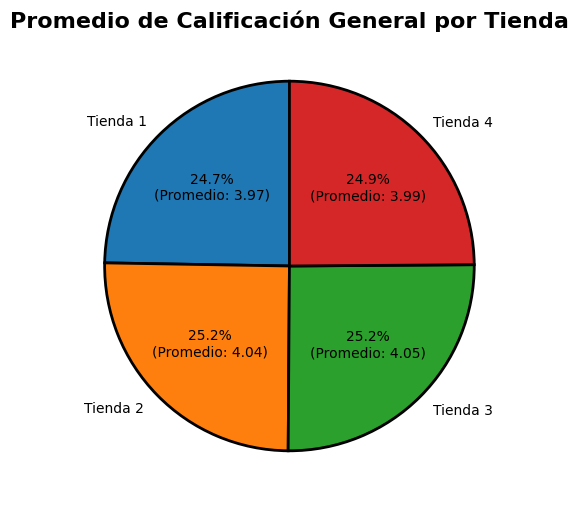

In [181]:
fig, ax3 = plt.subplots(figsize=(10, 6));
wedges, texts, autotexts = ax3.pie(
    promedio_calificaciones['promedio_cal'],
    labels=promedio_calificaciones['Tienda'],
    autopct='%1.1f%%',
    startangle=90,
    textprops=dict(color="black"),
    wedgeprops=dict(linewidth=2, edgecolor='#000000')
)

ax3.set_title('Promedio de Calificación General por Tienda', fontsize=16, fontweight='bold');

for i, autotext in enumerate(autotexts):
    autotext.set_text(f'{autotext.get_text()}\n(Promedio: {promedio_calificaciones["promedio_cal"][i]:.2f})');


- En conclusión:

In [182]:
df2['promedio_cal'] = pd.to_numeric(df2['promedio_cal'], errors='coerce');

print("La categoría con mejor calificación es:", df2.loc[df2['promedio_cal'].idxmax(), 'Categoría del Producto'], "con un promedio de calificación de", df2['promedio_cal'].max(), "por la tienda", df2.loc[df2['promedio_cal'].idxmax(), 'Tienda']);
print("La categoría con peor calificación es:", df2.loc[df2['promedio_cal'].idxmin(), 'Categoría del Producto'], "con un promedio de calificación de", df2['promedio_cal'].min(), "por la tienda", df2.loc[df2['promedio_cal'].idxmin(), 'Tienda']);


La categoría con mejor calificación es: Juguetes con un promedio de calificación de 4.2 por la tienda Tienda 3
La categoría con peor calificación es: Artículos para el hogar con un promedio de calificación de 3.75 por la tienda Tienda 1


## 4. Productos más y menos vendidos:

En este paso, debemos identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

- Lista de los Producos Más y Menos Vendidos por Tienda:

In [183]:
def calcular_ventas(store):
    df3 = pd.DataFrame(store);
    ventas = df3.groupby(['Producto'])['Producto'].count().reset_index(name='cantidad_vendida');
    mas_vendidos = ventas.sort_values(by='cantidad_vendida', ascending=False).head(3);
    menos_vendidos = ventas.sort_values(by='cantidad_vendida', ascending=True).head(3);
    return mas_vendidos, menos_vendidos;

for l, store in enumerate(stores):
    mas_vendidos, menos_vendidos = calcular_ventas(store);
    print(f"\nTienda {l+1} - Productos más vendidos:");
    print(mas_vendidos[['Producto', 'cantidad_vendida']].to_string(index=False));
    print(f"\nTienda {l+1} - Productos menos vendidos:");
    print(menos_vendidos[['Producto', 'cantidad_vendida']].to_string(index=False));


Tienda 1 - Productos más vendidos:
     Producto  cantidad_vendida
      Armario                60
TV LED UHD 4K                60
   Microondas                60

Tienda 1 - Productos menos vendidos:
                 Producto  cantidad_vendida
Auriculares con micrófono                33
             Celular ABXY                33
          Olla de presión                35

Tienda 2 - Productos más vendidos:
                 Producto  cantidad_vendida
Iniciando en programación                65
               Microondas                62
                  Batería                61

Tienda 2 - Productos menos vendidos:
       Producto  cantidad_vendida
  Juego de mesa                32
      Impresora                34
Mesa de comedor                34

Tienda 3 - Productos más vendidos:
       Producto  cantidad_vendida
  Kit de bancas                57
Mesa de comedor                56
      Cama king                56

Tienda 3 - Productos menos vendidos:
               Producto  c

- Convertimos la información obtenida en un dataframe para mayor eficiencia:

In [184]:
def calcular_ventas(store):
    df3 = pd.DataFrame(store);
    ventas = df3.groupby(['Producto'])['Producto'].count().reset_index(name='cantidad_vendida');
    mas_vendidos = ventas.sort_values(by='cantidad_vendida', ascending=False).head(3);
    menos_vendidos = ventas.sort_values(by='cantidad_vendida', ascending=True).head(3);
    return mas_vendidos, menos_vendidos;

mas_vendidos_list = [];
menos_vendidos_list = [];

for l, store in enumerate(stores):
    mas_vendidos, menos_vendidos = calcular_ventas(store);
    mas_vendidos['Tienda'] = f'Tienda {l+1}';
    menos_vendidos['Tienda'] = f'Tienda {l+1}';
    mas_vendidos['Tipo'] = 'Más vendidos';
    menos_vendidos['Tipo'] = 'Menos vendidos';
    mas_vendidos_list.append(mas_vendidos);
    menos_vendidos_list.append(menos_vendidos);

df3 = pd.concat(mas_vendidos_list + menos_vendidos_list, ignore_index=True);

print(df3)

                     Producto  cantidad_vendida    Tienda            Tipo
0                     Armario                60  Tienda 1    Más vendidos
1               TV LED UHD 4K                60  Tienda 1    Más vendidos
2                  Microondas                60  Tienda 1    Más vendidos
3   Iniciando en programación                65  Tienda 2    Más vendidos
4                  Microondas                62  Tienda 2    Más vendidos
5                     Batería                61  Tienda 2    Más vendidos
6               Kit de bancas                57  Tienda 3    Más vendidos
7             Mesa de comedor                56  Tienda 3    Más vendidos
8                   Cama king                56  Tienda 3    Más vendidos
9                    Cama box                62  Tienda 4    Más vendidos
10                 Cubertería                59  Tienda 4    Más vendidos
11                  Cama king                56  Tienda 4    Más vendidos
12  Auriculares con micrófono         

- Gráfica de los Productos Más y Menos Vendidos por Tienda:

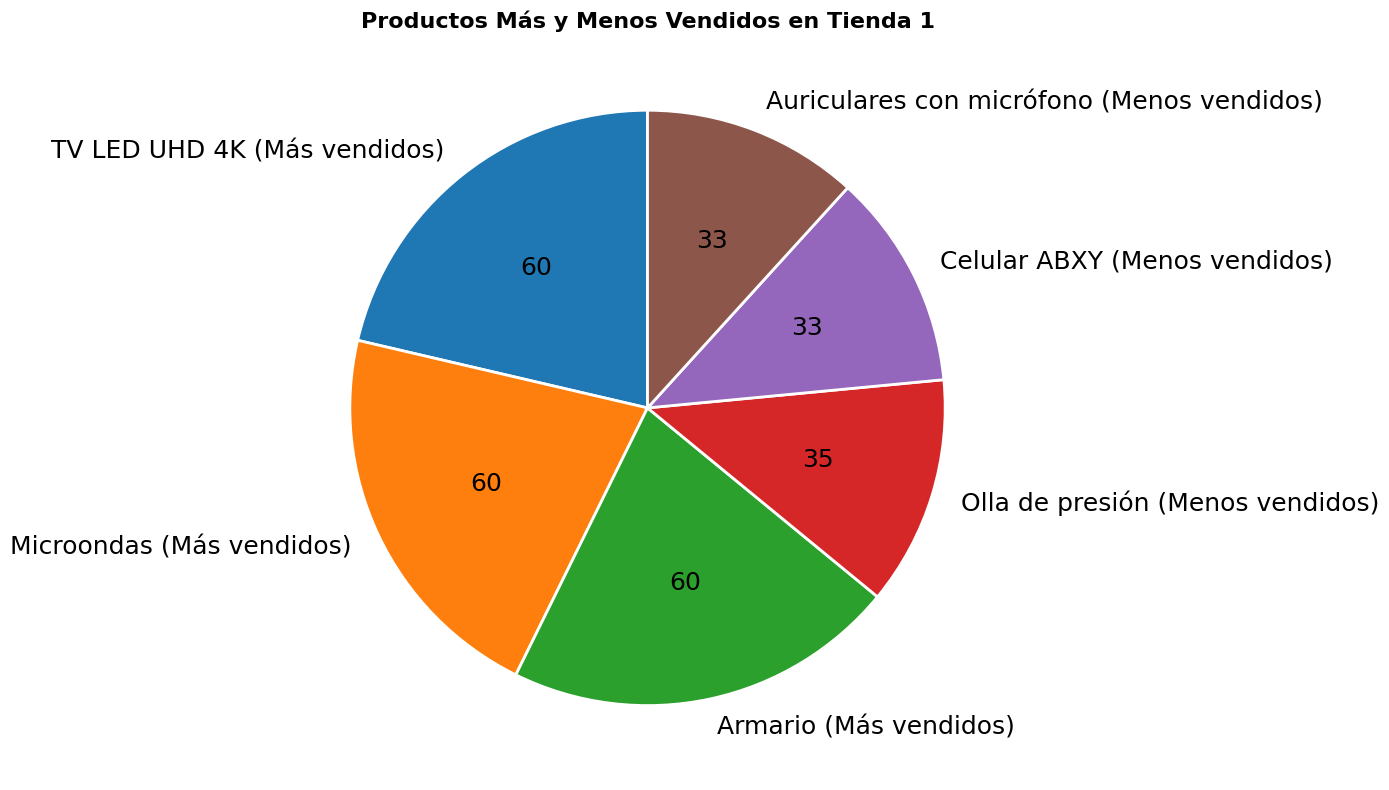

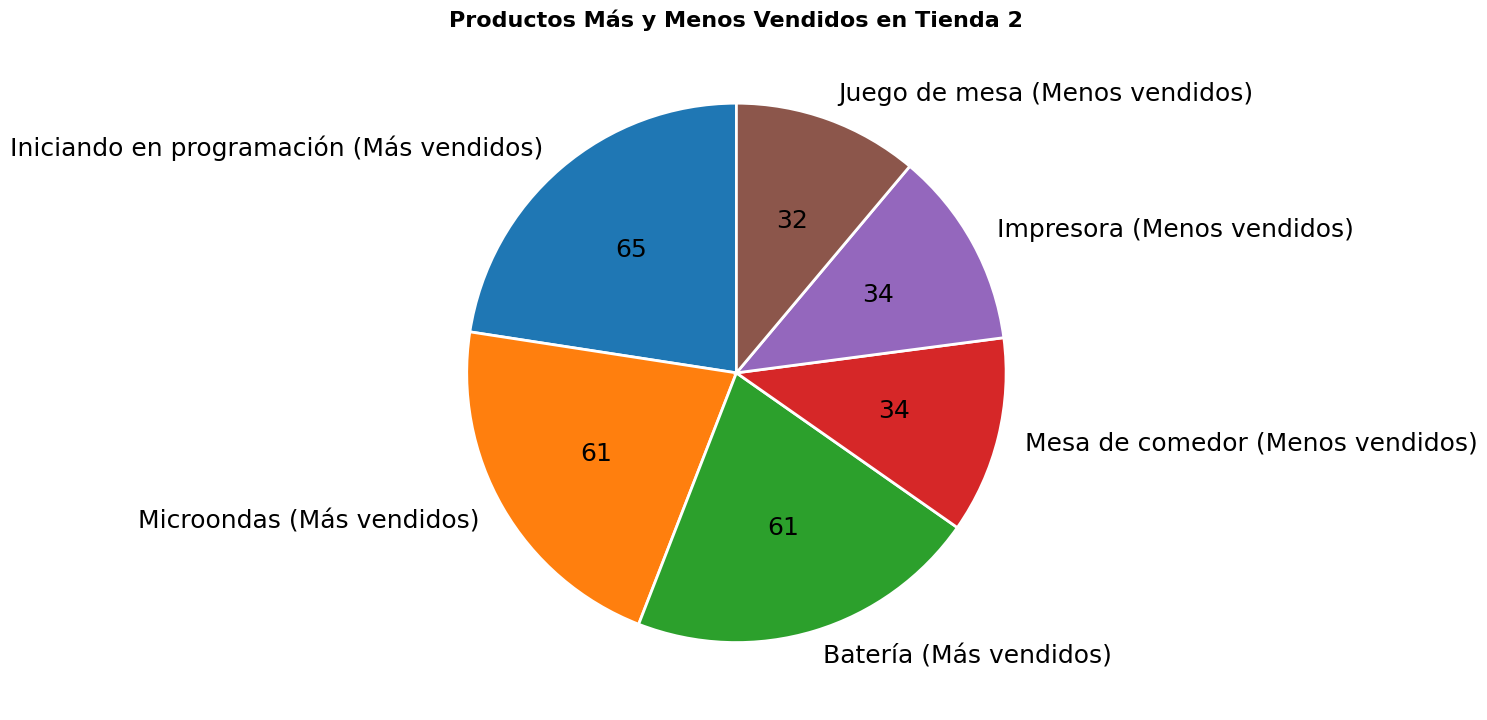

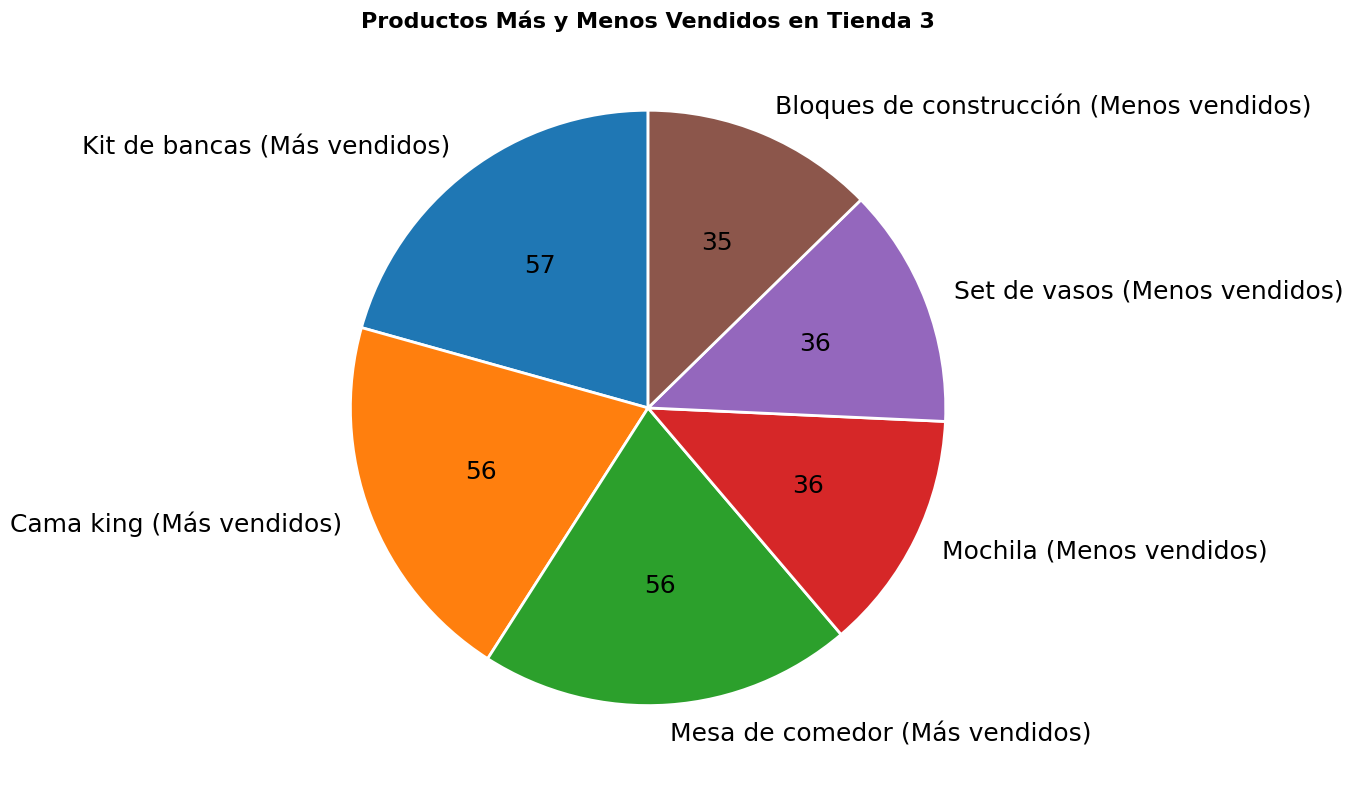

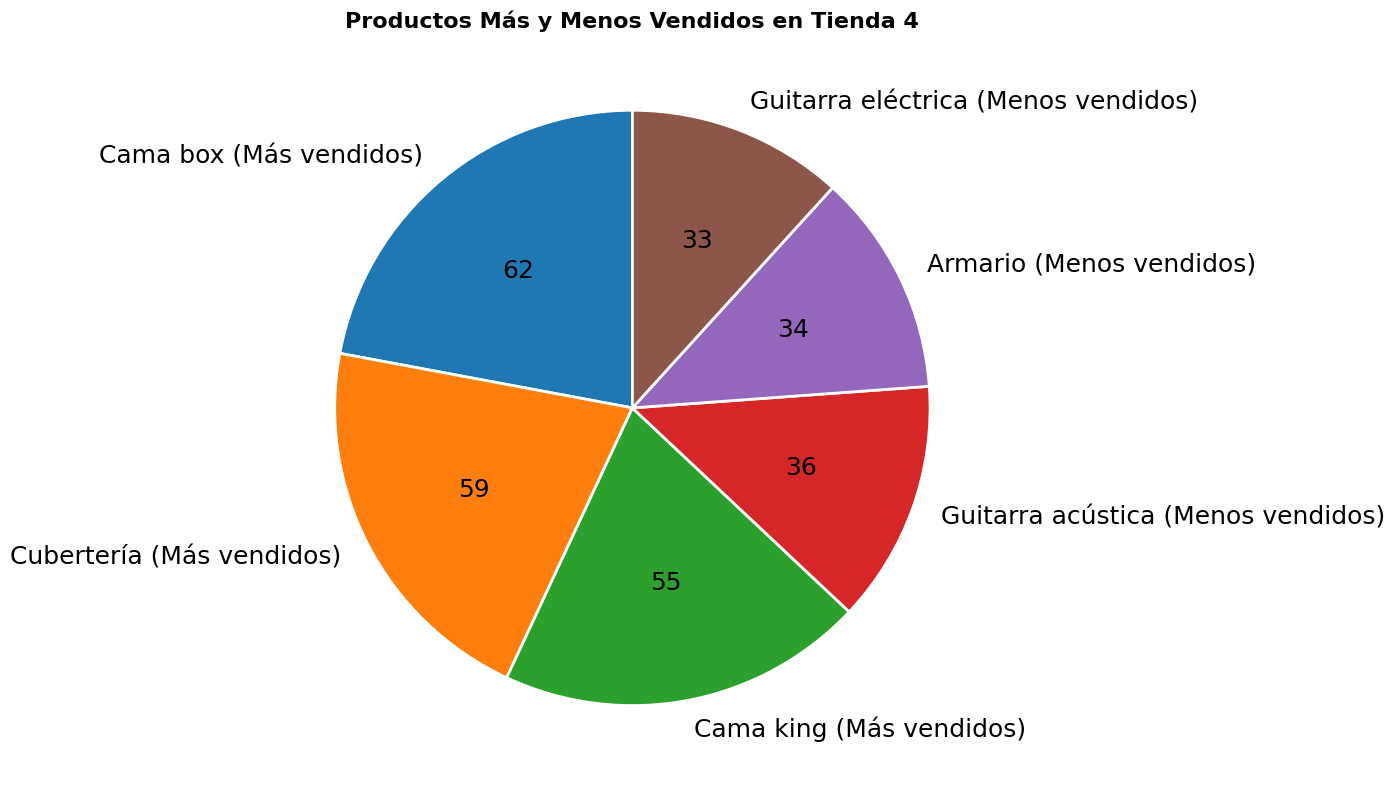

In [185]:
for idx in range(len(mas_vendidos_list)):
    mas_vendidos = mas_vendidos_list[idx]
    menos_vendidos = menos_vendidos_list[idx]
    
    productos = list(mas_vendidos['Producto']) + list(menos_vendidos['Producto'])
    cantidades = list(mas_vendidos['cantidad_vendida']) + list(menos_vendidos['cantidad_vendida'])
    tipos = ['Más vendidos'] * len(mas_vendidos) + ['Menos vendidos'] * len(menos_vendidos)
    tienda = mas_vendidos['Tienda'].iloc[0]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    def funcion_plot(pct, allvals):
        absolute = int(pct / 100. * sum(allvals))
        return f'{absolute}'
    
    orden = np.argsort(cantidades)[::-1]
    cantidades = [cantidades[i] for i in orden]
    productos = [productos[i] for i in orden]
    tipos = [tipos[i] for i in orden]

    wedges, texts, autotexts = ax.pie(
        cantidades,
        labels=[f"{p} ({t})" for p, t in zip(productos, tipos)],
        autopct=lambda pct: funcion_plot(pct, cantidades),
        startangle=90,
        textprops=dict(color="black", fontsize=18),
        wedgeprops=dict(linewidth=2, edgecolor="#FFFFFF")
    )
    ax.set_title(f'Productos Más y Menos Vendidos en {tienda}', fontsize=16, fontweight='bold')
    for i, autotext in enumerate(autotexts):
        autotext.set_text(f'{autotext.get_text()}')
    plt.tight_layout()
    plt.show()

## 5. Envío promedio por tienda:

En este paso, debemos calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

- Gastos de Envío Totales por Tienda:

In [186]:
stores = [tienda1, tienda2, tienda3, tienda4];
sum_stores = [];

def gastos_envio(store):
    df4 = pd.DataFrame(store);
    return df4['Costo de envío'].sum();

for i, store in enumerate(stores):
    envio = gastos_envio(store);
    print(f"Gastos de Envio Tienda {i+1}: ${envio:,.2f}");

Gastos de Envio Tienda 1: $61,377,900.00
Gastos de Envio Tienda 2: $59,485,100.00
Gastos de Envio Tienda 3: $58,516,600.00
Gastos de Envio Tienda 4: $55,317,400.00


- Promedio de los Gastos totales de las 4 Tiendas:

In [187]:
promedio_gastos_envio = sum([gastos_envio(store) for store in stores]) / len(stores);
print(f"Promedio de Gastos de Envío Totales: ${promedio_gastos_envio:,.2f}");

Promedio de Gastos de Envío Totales: $58,674,250.00


- Gráfica de Gasto de Envío por Tienda:

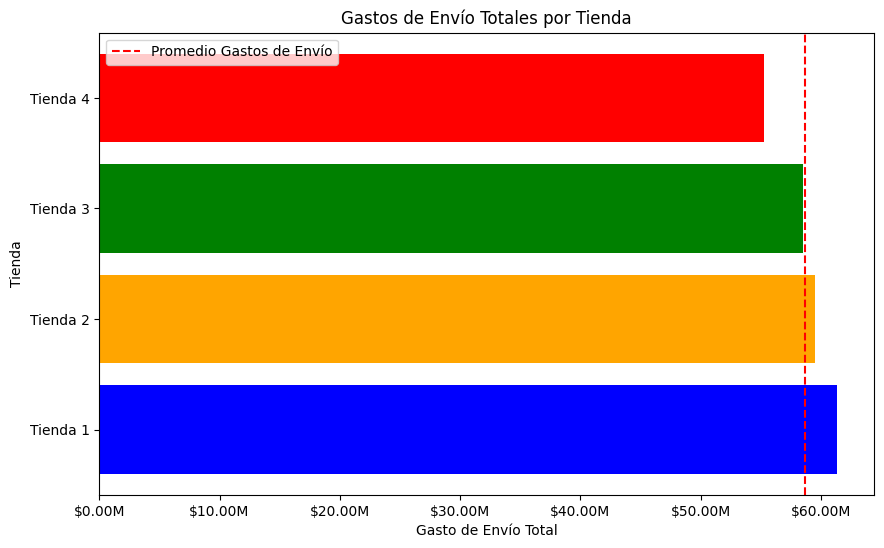

In [188]:
sum_stores = [gastos_envio(store) for store in stores]

plt.figure(figsize=(10, 6));
plt.axvline(promedio_gastos_envio, color='red', linestyle='--', label='Promedio Gastos de Envío');
plt.legend();
plt.title('Gastos de Envío Totales por Tienda');
plt.ylabel('Tienda');
plt.xlabel('Gasto de Envío Total');
escalax = ticker.FuncFormatter(lambda x, pos: '${:,.2f}M'.format(x/1e6));
plt.gca().xaxis.set_major_formatter(escalax);
plt.barh(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], sum_stores, color=['blue', 'orange', 'green', 'red']);


- Calculamos el Ingreso Neto por Tienda:

Recordemos que el ingreso neto es el ingreso por tienda menos el valor total del envio.

In [189]:
ingreso_neto = [calcular_total_vendido(store) - gastos_envio(store) for store in stores]
print("Ingreso Neto por Tienda:");
for i, neto in enumerate(ingreso_neto):
    print(f"Tienda {i+1}: ${neto:,.2f}");

Ingreso Neto por Tienda:
Tienda 1: $1,089,502,500.00
Tienda 2: $1,056,858,400.00
Tienda 3: $1,039,503,000.00
Tienda 4: $983,058,300.00


- Promedio de los Ingresos Netos de las 4 Tiendas:

In [190]:
promedio_neto = sum(ingreso_neto) / len(ingreso_neto);
print(f"Promedio de Ingresos Netos Totales: ${promedio_neto:,.2f}");

Promedio de Ingresos Netos Totales: $1,042,230,550.00


- Gráfica de Ingresos Netos por Tienda:

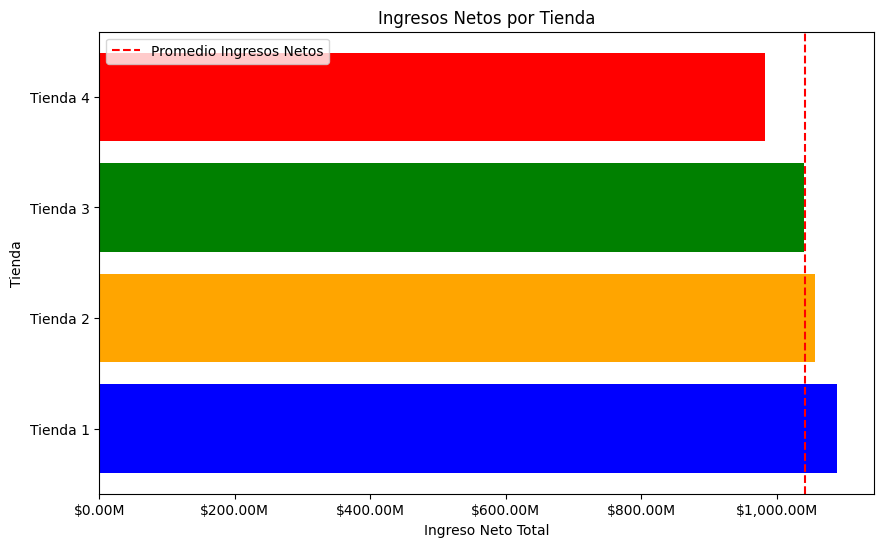

In [191]:
sum_stores = ingreso_neto

plt.figure(figsize=(10, 6));
plt.axvline(promedio_neto, color='red', linestyle='--', label='Promedio Ingresos Netos');
plt.legend();
plt.title('Ingresos Netos por Tienda');
plt.ylabel('Tienda');
plt.xlabel('Ingreso Neto Total');
escalax = ticker.FuncFormatter(lambda x, pos: '${:,.2f}M'.format(x/1e6));
plt.gca().xaxis.set_major_formatter(escalax);
plt.barh(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], sum_stores, color=['blue', 'orange', 'green', 'red']);



- En conclusión:

In [192]:
print("La Tienda con mayor ingreso neto es la Tienda", ingreso_neto.index(max(ingreso_neto)) + 1, f"con un ingreso neto total de ${max(ingreso_neto):,.2f}.")
print("Y la Tienda con menor ingreso neto es la Tienda", ingreso_neto.index(min(ingreso_neto)) + 1, f"con un ingreso neto total de ${min(ingreso_neto):,.2f}.")


La Tienda con mayor ingreso neto es la Tienda 1 con un ingreso neto total de $1,089,502,500.00.
Y la Tienda con menor ingreso neto es la Tienda 4 con un ingreso neto total de $983,058,300.00.


## 6.Localización de las Ventas:

En este extra, tendremos el desafío de explorar las coordenadas geográficas de los datos de ventas e identificar patrones relacionados con la ubicación de las compras. Al utilizar las columnas de latitud y longitud, puede generar visualizaciones para comprender cómo varían las ventas según la ubicación geográfica.

- Desafío:

-- Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos.

-- Genere gráficos de dispersión o mapas de calor (Heatmaps) para visualizar datos e identificar áreas con la mayor concentración de ventas.

-- Explore si algunas tiendas tienen un rendimiento superior o inferior al esperado en determinadas regiones e identifique si existen patrones geográficos que puedan influir en el rendimiento de las tiendas.

- Instalamos las bibliotecas correspondientes y sus modulos:

In [ ]:
%pip install contextily

In [ ]:
%pip install geopandas

In [197]:
import geopandas as gpd

- Mapa de las Coordenadas Geográficas de los Datos de Venta:

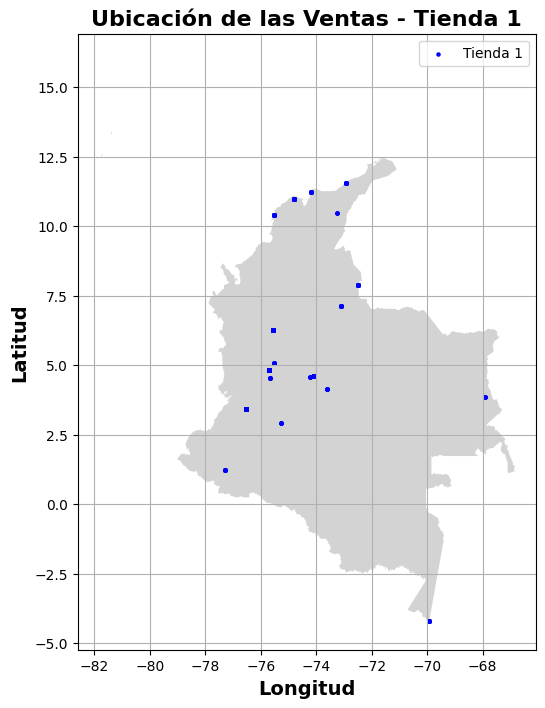

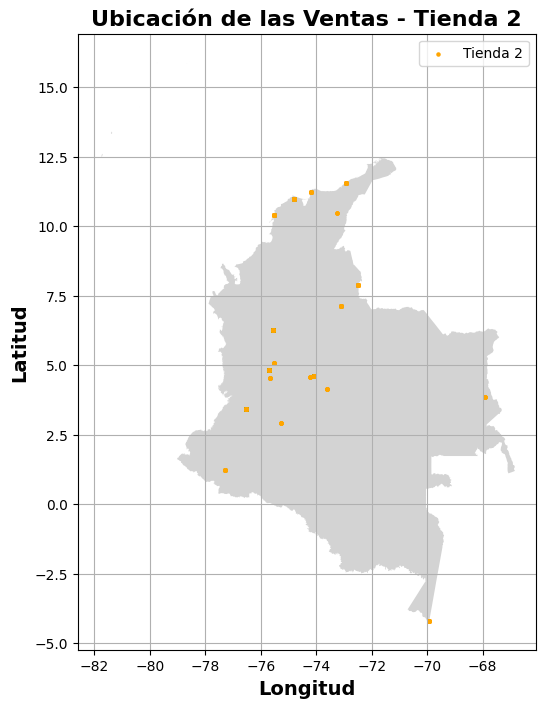

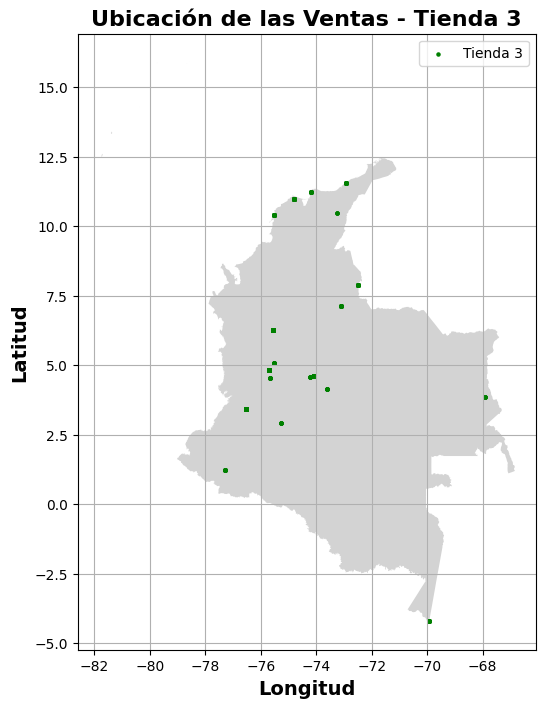

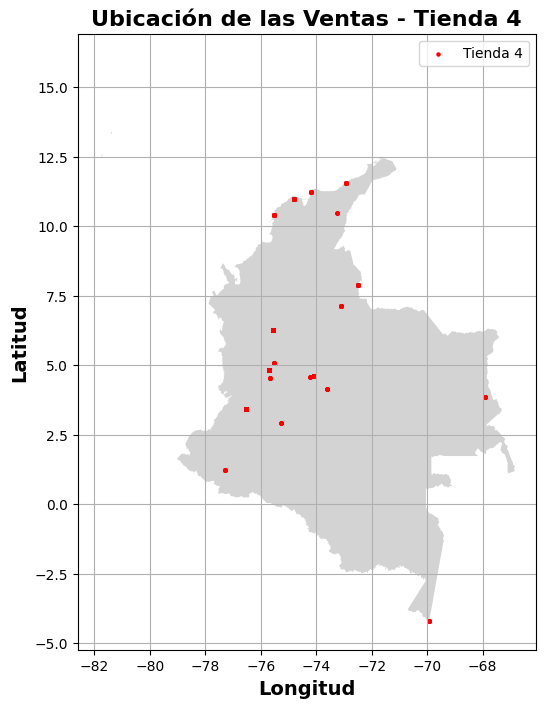

In [217]:
tienda = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
geo = gpd.GeoDataFrame(tienda,
                       geometry=gpd.points_from_xy(tienda['lon'], tienda['lat']),
                       crs="EPSG:4326")
# Puedes obtener un mapa actualizado de Colombia usando datos abiertos de límites administrativos.
# Una opción es descargar el shapefile de Colombia desde el DANE o GADM, pero para uso rápido puedes usar GeoPandas con un archivo GeoJSON de un repositorio confiable.

# Ejemplo usando un GeoJSON de GADM (nivel 0, país completo):
try:
    colombia = gpd.read_file("https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_COL_0.json")
    colombia = colombia.to_crs("EPSG:4326")
except Exception as e:
    print("Error al cargar el mapa de Colombia:", e)

for tienda_df, store_name, color in zip([tienda1, tienda2, tienda3, tienda4], ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], ['blue', 'orange', 'green', 'red']):
    fig, ax = plt.subplots(figsize=(6, 8))
    if 'colombia' in locals():
        colombia.plot(ax=ax, color='lightgray')
    else:
        print("Mapa de Colombia no disponible, solo se mostrarán los puntos de ventas.")
    geo_subset = geo.iloc[tienda_df.index]
    geo_subset.plot(ax=ax, marker='o', color=color, markersize=5, label=store_name)
    ax.set_title(f'Ubicación de las Ventas - {store_name}', fontsize=16, fontweight='bold')
    ax.set_xlabel('Longitud', fontsize=14, fontweight='bold')
    ax.set_ylabel('Latitud', fontsize=14, fontweight='bold')
    ax.legend()
    plt.grid(True)
    plt.show()

### Análisis Final:

Después de analizar los datos, mi recomendación es que el Sr. Juan venda la Tienda 4, dadas las siguientes razones:

- Baja facturación: La Tienda 4 tiene los ingresos más bajos entre las 4 tiendas. Esto indica un menor volumen de ventas y un potencial de ingresos más bajo para el Sr. Juan.

- Calificación promedio baja: Aunque la calificación promedio de la Tienda 4 es la segunda más baja, no esta tan alejada de la peor, lo que sugiere una menor satisfacción del cliente, lo cual puede generar perdidas de clientes.

- Costo de envío bajo: Si bien su costo de envio es el más bajo, no compensa las perdidas.

En resumen, se recomienda vender la Tienda 4, ya que sus ingresos son los menos notables, y presenta el peor desempeño en términos de facturación, calificación del cliente y costo de envío. La tienda a largo plazo presenta una categoría de productos menos estable en ventas y una tendencia de calificaciones a la baja lo que la convierte en la menos necesaria para el Sr. Juan. Al vender esta tienda, el Sr. Juan puede concentrarse en las tiendas con mejor rendimiento y maximizar su potencial de ventas. 

Y aunque se venda la Tienda 4, hay que tener en cuenta lo siguiente:

- Se debe realizar un seguimiento a las ventas de la Tienda 1, que tienen una tendencia a disminuir.

- Se debe analizar el por qué de las calificaciones bajas que han recibido las tiendas.

- Se deben generar estrategias para que la distribución de las ventas en las tiendas favorezcan la compra de productos que generan mayores ingresos.